In [1]:
%matplotlib notebook

In [2]:
import os
import sys
import time

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import importlib

sys.path.append('..')

In [3]:
def load_dataset(train_file, ):
    ftrain = open(train_file, "r")
    trainlines = ftrain.read().splitlines()
    train_target = []
    train_search = []
    train_box = []
    for line in trainlines:
        line = line.split(",")
        train_target.append(line[0])
        train_search.append(line[1])
        box = [float(line[2]), float(line[3]), float(line[4]), float(line[5])]
        train_box.append(box)
    ftrain.close()

    return [train_target, train_search, train_box]

def draw_detections(img, rects, thickness = 1):
    colors = [(255,0,0),(0,255,0),(0,0,255)]
    for k, c in zip(rects.keys(), colors):
        (x, y, w, h) = rects[k]
        pad_w, pad_h = int(0.15*w), int(0.05*h)
        cv2.rectangle(img, (x+pad_w, y+pad_h), (x+w-pad_w, y+h-pad_h), c, thickness)
        cv2.putText(img, str(k), (x+pad_w, y+pad_h-10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, c)
    
def animate(data, interval=24, delay=3000, fig=None, ax=None):
    if not (ax and fig):
        fig, ax = plt.subplots()
    ims = [[ax.imshow(img, animated=True)] for img in iter(data)]
    ani = animation.ArtistAnimation(fig, ims, interval=interval, repeat_delay=delay)
    return ani

In [4]:
[train_target, train_search, train_box] = load_dataset('./test_set.txt')

In [5]:
[_, _, pred_box] = load_dataset('./test_bbox.txt')

In [6]:
print(pred_box[1])
print(train_box[1])

[0.15633331, 0.10821841, 0.6524442, 0.61916435]
[0.1585714285714289, 0.021351351351351328, 0.6392857142857142, 0.5735135135135134]


In [7]:
search_data = [cv2.resize(cv2.imread(i)[...,::-1], (227, 227), interpolation = cv2.INTER_LINEAR) for i in train_search]

In [9]:
for img, pred, gt  in zip(search_data, pred_box, train_box):
        h, w, _ = img.shape
        rects = {
            'gt': [ int(gt[0]*w), int(gt[1]*h), int(gt[2]*w), int(gt[3]*h)],
            'pred': [ int(pred[0]*w), int(pred[1]*h), int(pred[2]*w), int(pred[3]*h)]
        }
        draw_detections(img, rects)

<IPython.core.display.Javascript object>


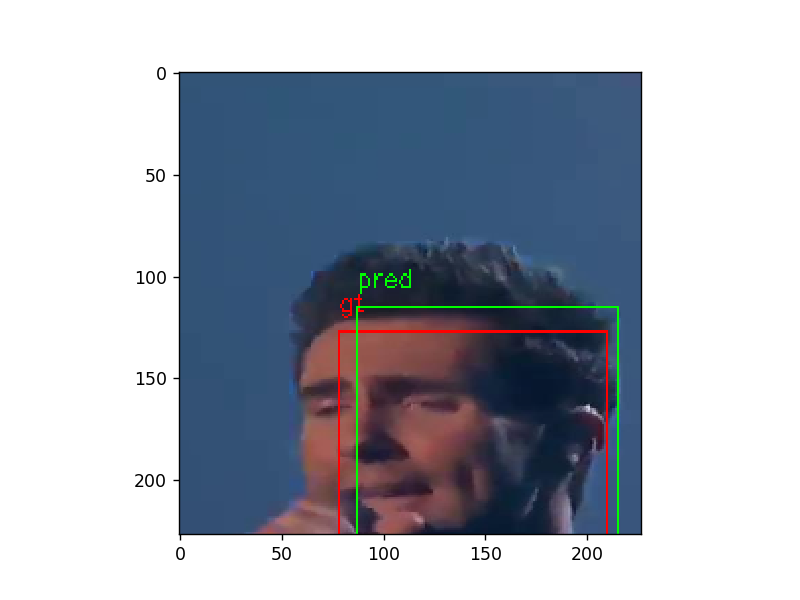

In [43]:
animate(search_data, interval=1000)

In [35]:
data_path = '../keras-yolo3/data/Girl2/img/'

In [36]:
with open('./Girl2.txt','w') as fsurf:
    names = sorted(os.listdir(data_path))
    for idx, name in enumerate(names[:-1]):
        fsurf.write('./Girl2/prev/%s,'%(names[idx]))
        fsurf.write('./Girl2/current/%s,'%(names[idx+1]))
        fsurf.write('0,0,0,0')
        fsurf.write('\n')        

In [37]:
surf_data = [cv2.resize(cv2.imread(data_path+i)[...,::-1], (227, 227), interpolation = cv2.INTER_LINEAR) 
             for i in sorted(os.listdir(data_path))]

In [39]:
[_, _, surf_pred_box] = load_dataset('./test_bbox.txt')

In [40]:
print(len(surf_data))
print(len(surf_pred_box))

1500
1490


In [41]:
for img, pred  in zip(surf_data, surf_pred_box):
    h, w, _ = img.shape
    rects = {
        'pred': [ int(pred[0]*w), int(pred[1]*h), int(pred[2]*w), int(pred[3]*h)]
    }
    draw_detections(img, rects)

<IPython.core.display.Javascript object>


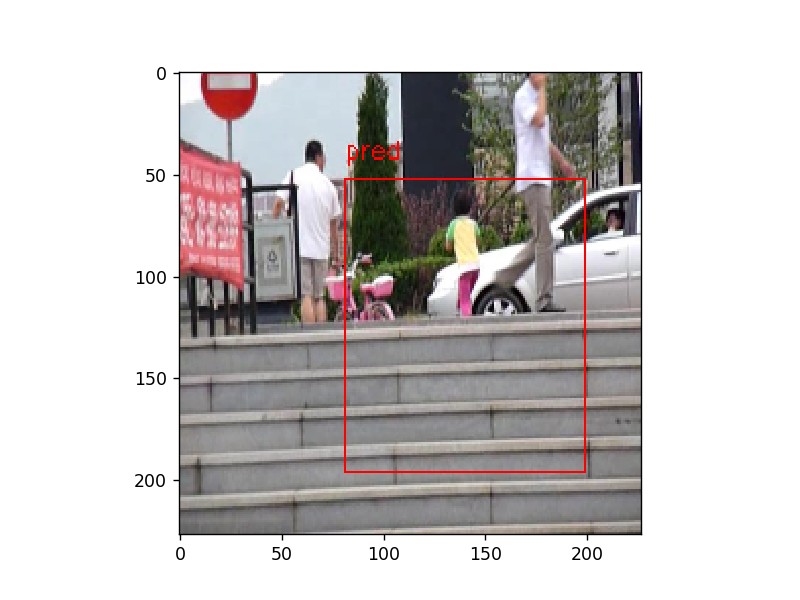

In [42]:
animate(surf_data)